# Project Overview: Predicting Future Prices of Commodities using Facebook Prophet

In this case study, we will focus on predicting future prices of commodities using historical data. Specifically, we will work with avocado price data to build a time series forecasting model. This approach can be applied to various commodities, including stocks and other retail items.

## Key Points

### Objective
- Predict future avocado prices using historical retail scan data from 2018. The goal is to apply time series forecasting techniques to make accurate price predictions.

### Dataset
- **Name:** Avocado Prices Dataset
- **Content:** Weekly 2018 retail scan data for avocado prices and volumes across various U.S. regions.
- **Columns:**
  - **Date:** Date of the observation.
  - **Average Price:** Average price per unit of avocado.
  - **Type:** Type of avocado (Conventional or Organic).
  - **Year:** Year of the observation.
  - **Region:** Geographic region of the data collection.
  - **Total Volume:** Total number of avocados sold.
  - **PLU:** Product Lookup Code indicating the type of avocado.

### Methodology
1. **Import Libraries:**
   - Import necessary packages including Pandas, NumPy, Matplotlib, Seaborn, and Prophet for data manipulation, visualization, and forecasting.

2. **Load Dataset:**
   - Read the avocado price data from a CSV file into a DataFrame.

3. **Data Exploration:**
   - Explore and visualize the dataset to understand its structure and content.

4. **Time Series Forecasting:**
   - Use Facebook Prophet to predict future avocado prices based on historical data. Focus on the `Date` and `Average Price` columns for forecasting


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [6]:
from prophet import Prophet

In [8]:
avocado_df = pd.read_csv(r"D:\Navendu\ML Practical Projects\P74-Project-4\Project 4\avocado.csv")

In [15]:
avocado_df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [23]:
avocado_df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
avocado_df = avocado_df.sort_values("Date")

In [34]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


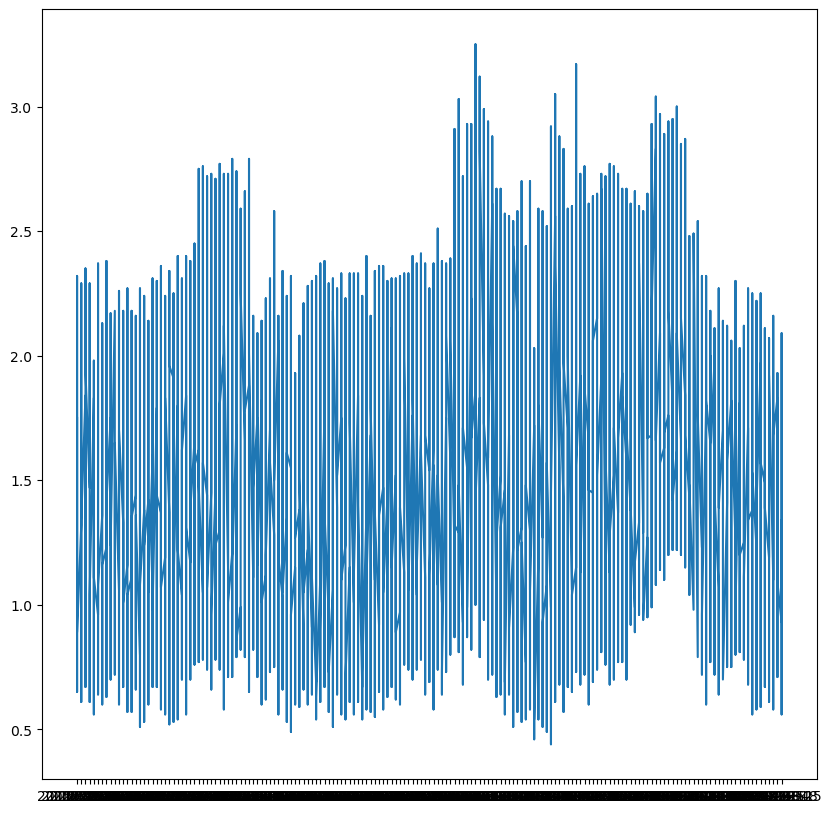

In [38]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53],
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0,

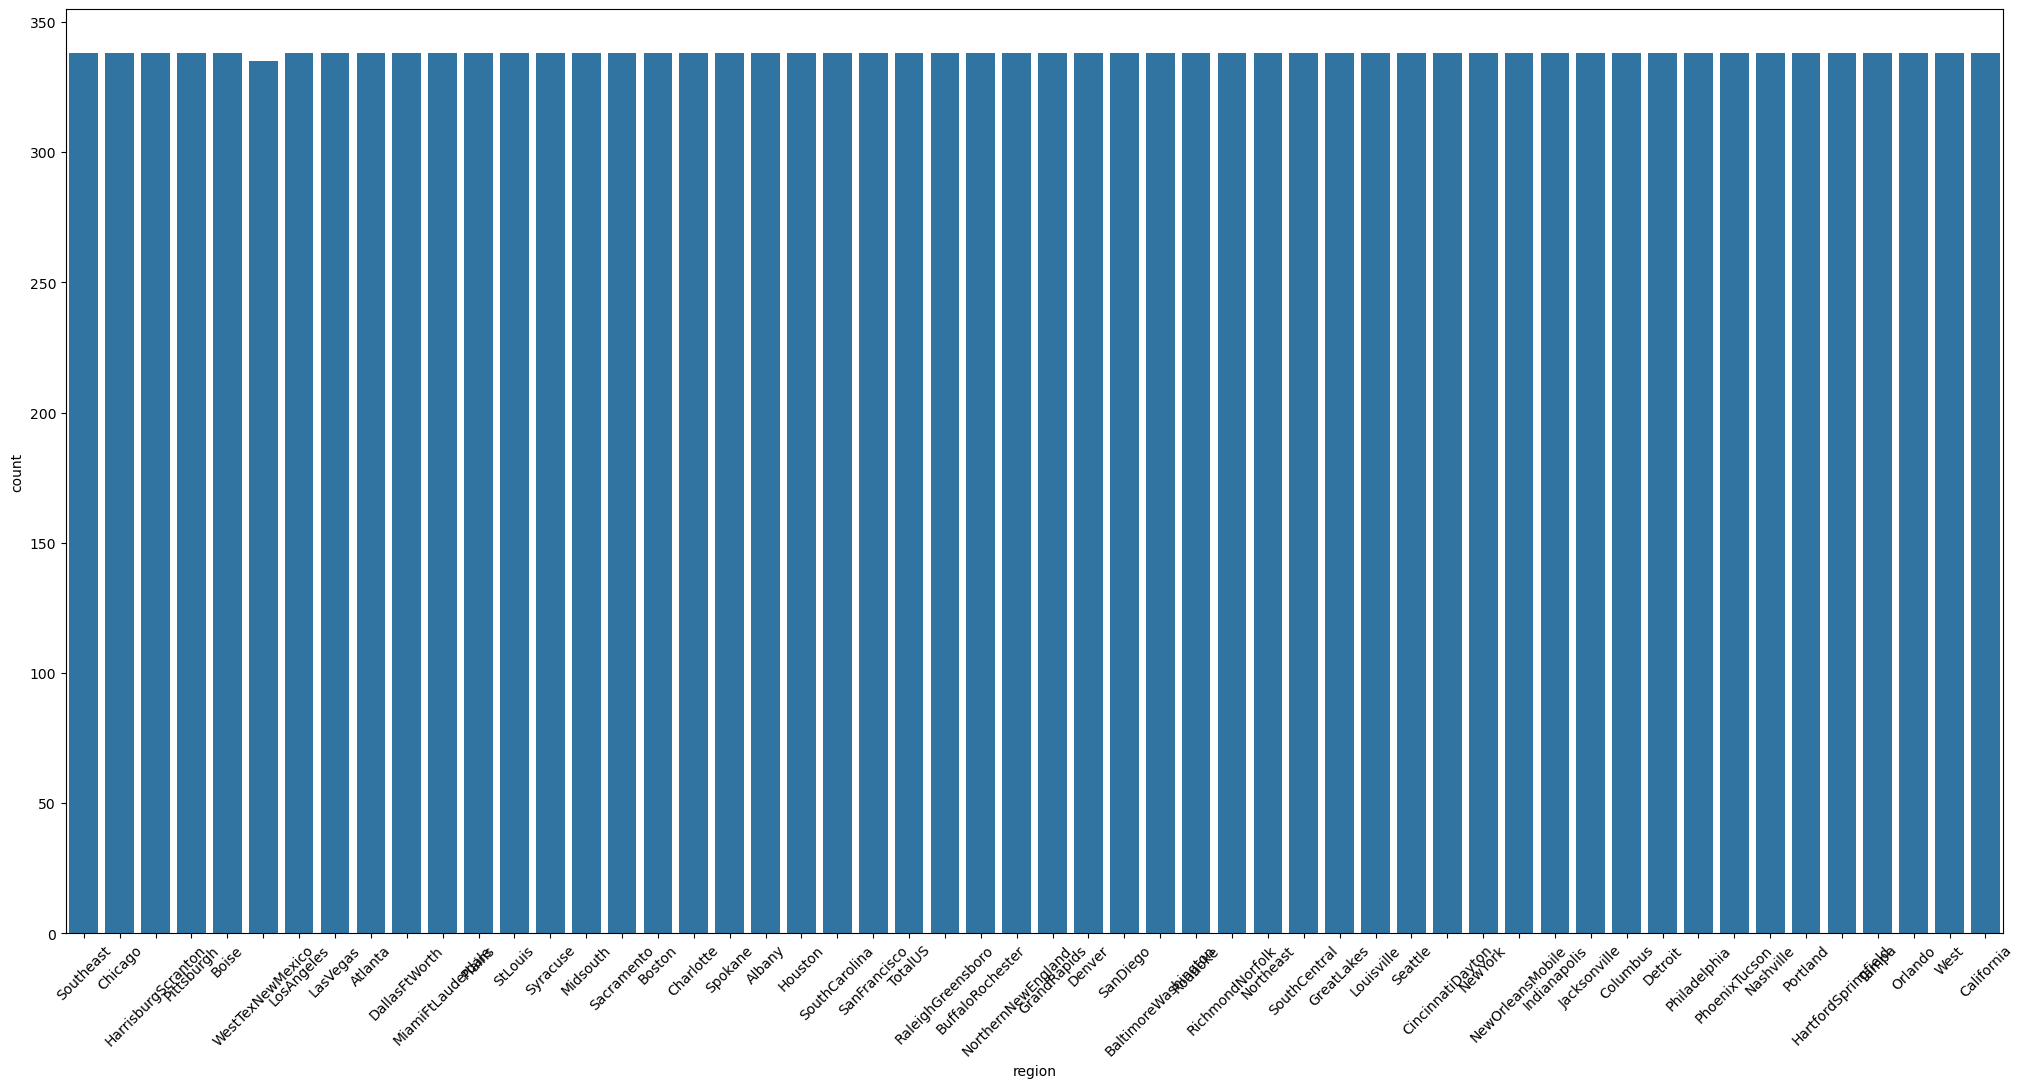

In [52]:
plt.figure(figsize=(25,12))
sns.countplot(x='region', data = avocado_df)
plt.xticks(rotation = 45)

<Axes: xlabel='year', ylabel='count'>

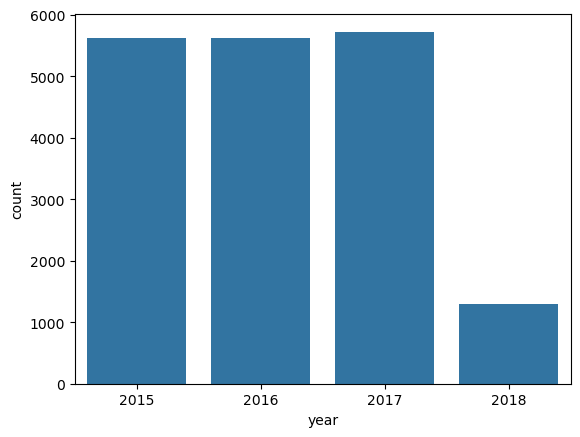

In [56]:
sns.countplot(x = 'year', data = avocado_df)

In [58]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [60]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [65]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [67]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [71]:
m = Prophet()

In [73]:
m.fit(avocado_prophet_df)

12:38:14 - cmdstanpy - INFO - Chain [1] start processing
12:38:19 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
future_price= m.make_future_dataframe(periods = 365)
forecast = m.predict(future_price)

In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498517,0.917149,1.891144,1.498517,1.498517,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,-0.113702,0.0,0.0,0.0,1.384815
1,2015-01-11,1.493341,0.883967,1.869969,1.493341,1.493341,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,-0.105274,0.0,0.0,0.0,1.388067
2,2015-01-18,1.488165,0.907573,1.884998,1.488165,1.488165,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,-0.104955,0.0,0.0,0.0,1.383211
3,2015-01-25,1.482990,0.838475,1.816453,1.482990,1.482990,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,-0.123919,0.0,0.0,0.0,1.359070
4,2015-02-01,1.477814,0.869529,1.811416,1.477814,1.477814,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,-0.152293,0.0,0.0,0.0,1.325521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167515,0.529693,1.558763,0.973164,1.343595,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,-0.086476,0.0,0.0,0.0,1.081039
530,2019-03-22,1.166795,0.583157,1.610875,0.971156,1.343442,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,-0.084782,0.0,0.0,0.0,1.082013
531,2019-03-23,1.166076,0.548294,1.575522,0.969149,1.343289,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,-0.082813,0.0,0.0,0.0,1.083263
532,2019-03-24,1.165356,0.550466,1.591827,0.967142,1.343554,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,-0.080588,0.0,0.0,0.0,1.084768


C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


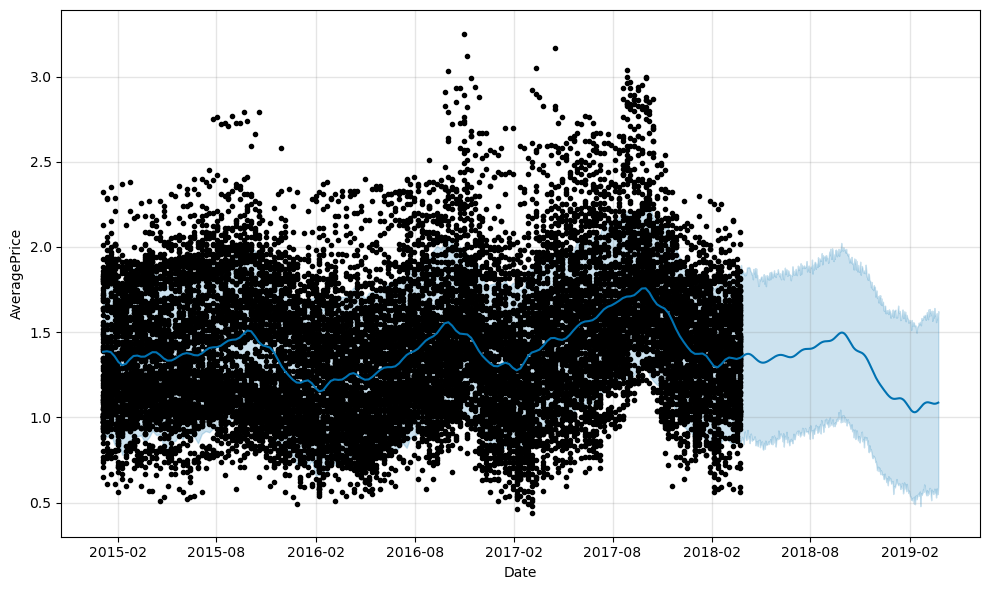

In [81]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'AveragePrice')

C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

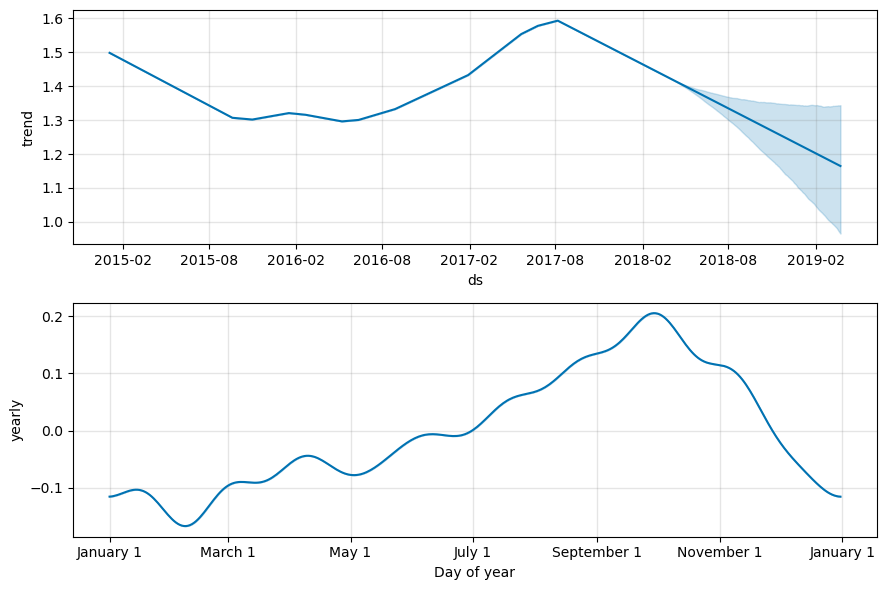

In [92]:
figure = m.plot_components(forecast)

In [89]:
print(future_price.columns)

Index(['ds'], dtype='object')


In [106]:
avocado_df = pd.read_csv(r"D:\Navendu\ML Practical Projects\P74-Project-4\Project 4\avocado.csv")

In [108]:
avocado_df_sample = avocado_df[avocado_df['region']== 'West']

In [110]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

In [112]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


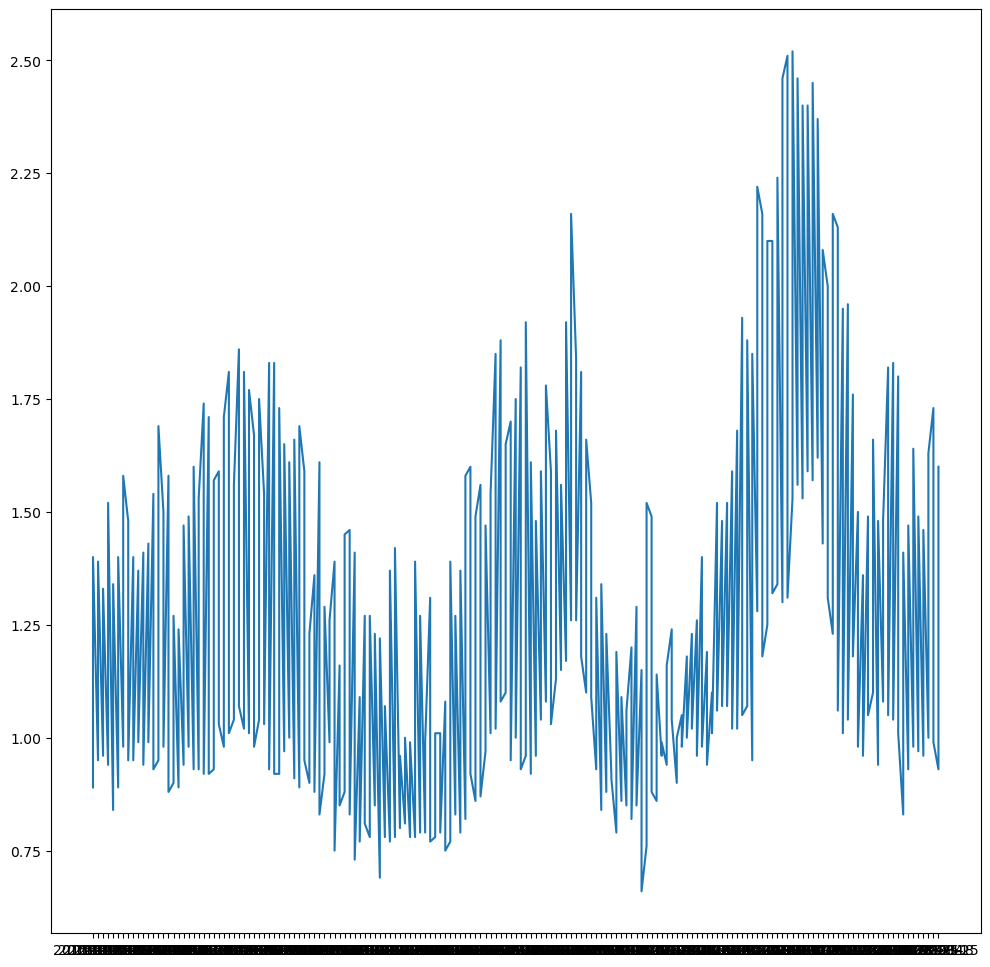

In [116]:
plt.figure(figsize = (12,12))
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [118]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [120]:
avocado_df_sample

,Unnamed: 0,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [122]:
m = Prophet()
m.fit(avocado_df_sample)

12:59:50 - cmdstanpy - INFO - Chain [1] start processing
12:59:50 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [126]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244729,0.624011,1.474658,1.244729,1.244729,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,0.0,0.0,0.0,1.059830
1,2015-01-11,1.243886,0.672008,1.496582,1.243886,1.243886,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,0.0,0.0,0.0,1.078580
2,2015-01-18,1.243043,0.663296,1.496284,1.243043,1.243043,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,0.0,0.0,0.0,1.086925
3,2015-01-25,1.242200,0.637133,1.495578,1.242200,1.242200,-0.168805,-0.168805,-0.168805,-0.168805,-0.168805,-0.168805,0.0,0.0,0.0,1.073395
4,2015-02-01,1.241357,0.627872,1.506883,1.241357,1.241357,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,0.0,0.0,0.0,1.050158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735710,1.111740,1.947460,1.708657,1.763768,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,0.0,0.0,0.0,1.531310
530,2019-03-22,1.736288,1.109664,1.973924,1.709083,1.764529,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,0.0,0.0,0.0,1.536975
531,2019-03-23,1.736866,1.138087,1.990414,1.709491,1.765289,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,0.0,0.0,0.0,1.543205
532,2019-03-24,1.737444,1.115711,1.994969,1.709899,1.766046,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,0.0,0.0,0.0,1.549897


C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


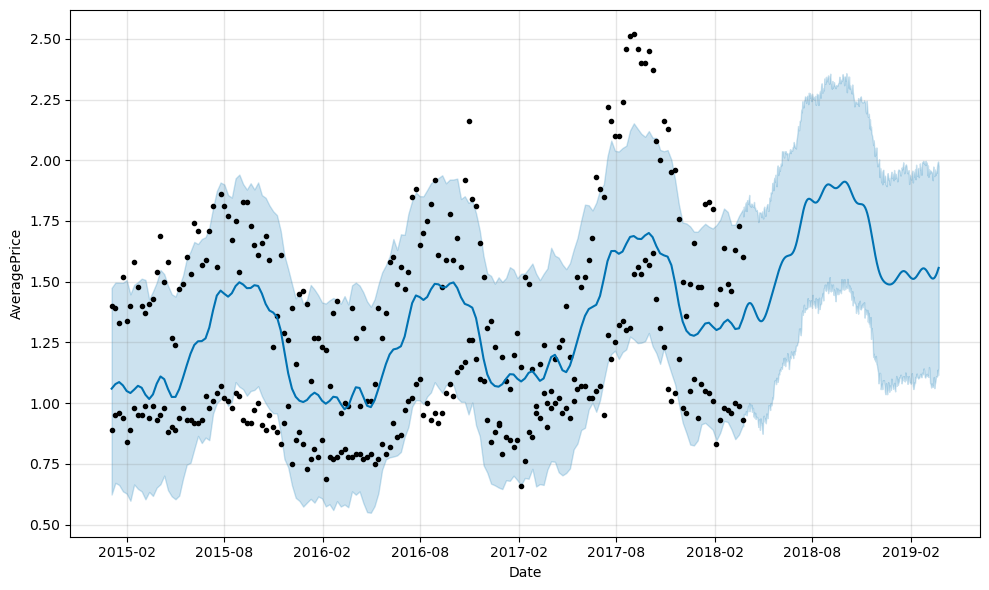

In [130]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'AveragePrice')

C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\naven\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

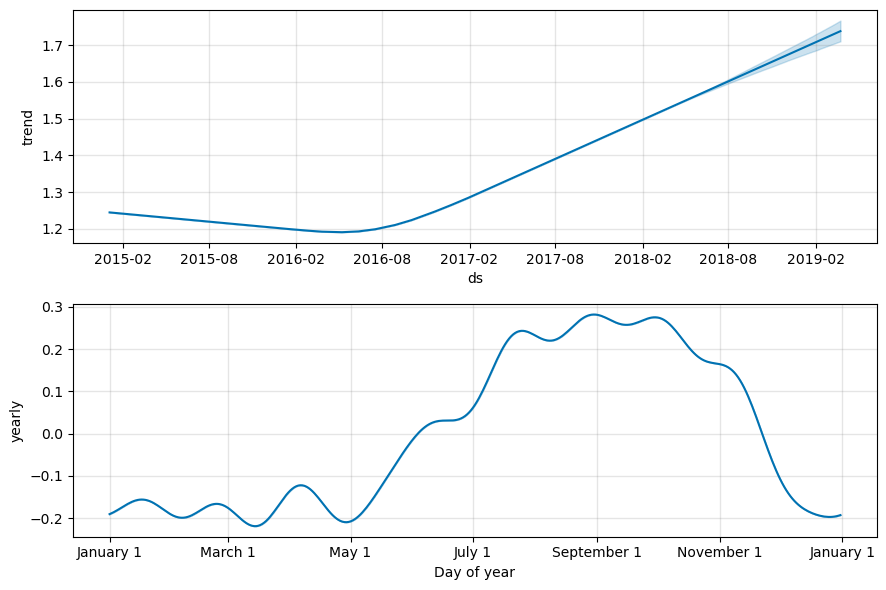

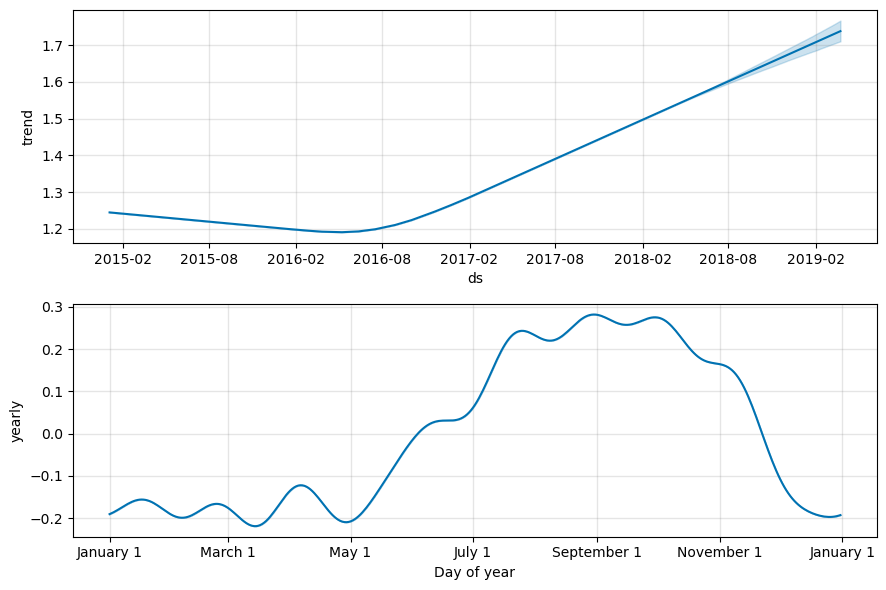

In [132]:
m.plot_components(forecast)